In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_fourier_transform(y, sr):
    D = np.abs(librosa.stft(y))
    plt.figure(figsize=(10, 4))
    """
    Le resultat de la transformation de Fourier est une matrice de nombres complexes. 
    La fonction amplitude_to_db convertit ces nombres complexes en une matrice de nombres réels.
    La visualisation est un spectrogramme.(axe des x : temps, axe des y : fréquence)
    """
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time', sr=sr)
    plt.title('Fourier Transform')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()

def plot_mfcc(y, sr):
    """
    MFCC est une technique de traitement du signal audio qui permet de représenter le spectre de puissance d'un signal audio.
    Le resultat de mfcc est une matrice de nombres réels.
    axe des x : temps
    axe des y : coefficients mfcc(ces coefficients sont des valeurs réelles qui représentent le spectre de puissance du signal audio)
    """
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()


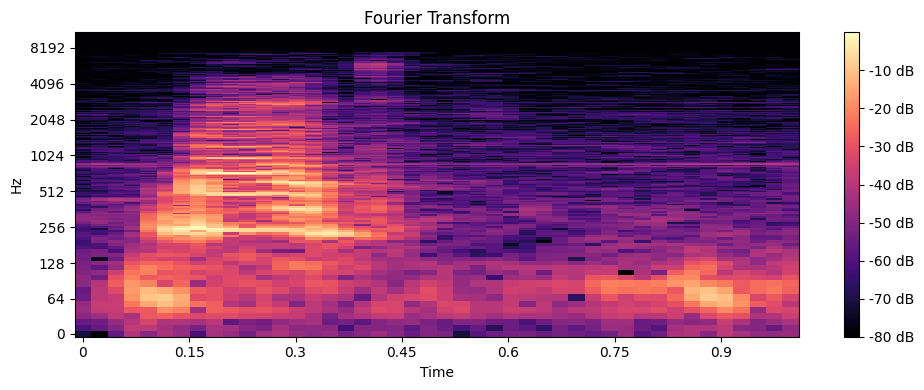

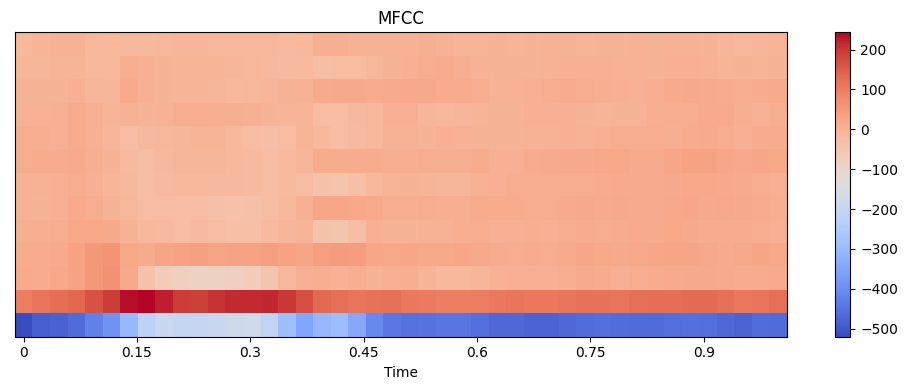

In [4]:
file_path = '0b7ee1a0_nohash_0.wav' 
y, sr = librosa.load(file_path)

plot_fourier_transform(y, sr)
plot_mfcc(y, sr)
plt.show()



## POUR MFCC
Préaccentuation : La première étape consiste à appliquer un filtre de préaccentuation au signal pour augmenter l'énergie des hautes fréquences. 

Segmentation en trames : Le signal audio est divisé en courts segments temporels. Étant donné que le signal audio varie dans le temps, cette méthode permet de supposer que le signal est stationnaire dans de petites fenêtres de temps.

Application d'une fenêtre : Une fenêtre (comme la fenêtre de Hamming) est appliquée à chaque trame pour minimiser les discontinuités aux bords de la trame.

Transformée de Fourier rapide (FFT) : Une transformée de Fourier rapide est effectuée sur chaque trame fenêtrée pour obtenir ses composantes fréquentielles.

Filtres de Mel : Les résultats de la FFT sont passés à travers un ensemble de filtres de Mel. Ces filtres tentent d'imiter la perception auditive non linéaire de l'oreille humaine, rendant les caractéristiques plus proches de la perception auditive humaine.

Énergie logarithmique : L'énergie logarithmique de la sortie de chaque filtre de Mel est calculée, basée sur la caractéristique logarithmique de l'audition humaine.

Transformée en cosinus discrète (DCT) : Une transformée en cosinus discrète est appliquée aux valeurs d'énergie logarithmiques pour obtenir un ensemble de coefficients céphalométriques de fréquence de Mel. L'objectif de cette étape est de compresser les coefficients d'énergie du groupe de filtres dans une dimension plus petite.

首先对音频信号进行FFT，将其从时域转换到频域，然后将频域信号通过梅尔滤波器组，按照人耳的听觉特性提取频谱特征